# Explore here

Una aseguradora quiere saber cual es la prima que se debe aplicar a sus clientes, a partir de datos fisiologicos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
medical = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


La informacion del conjunto de datos nos dice que hay 4 variables numericas y 3 categoricas

In [ ]:
medical.shape

(1338, 7)

Se realizan graficas de relacion para dar informacion general de los datos

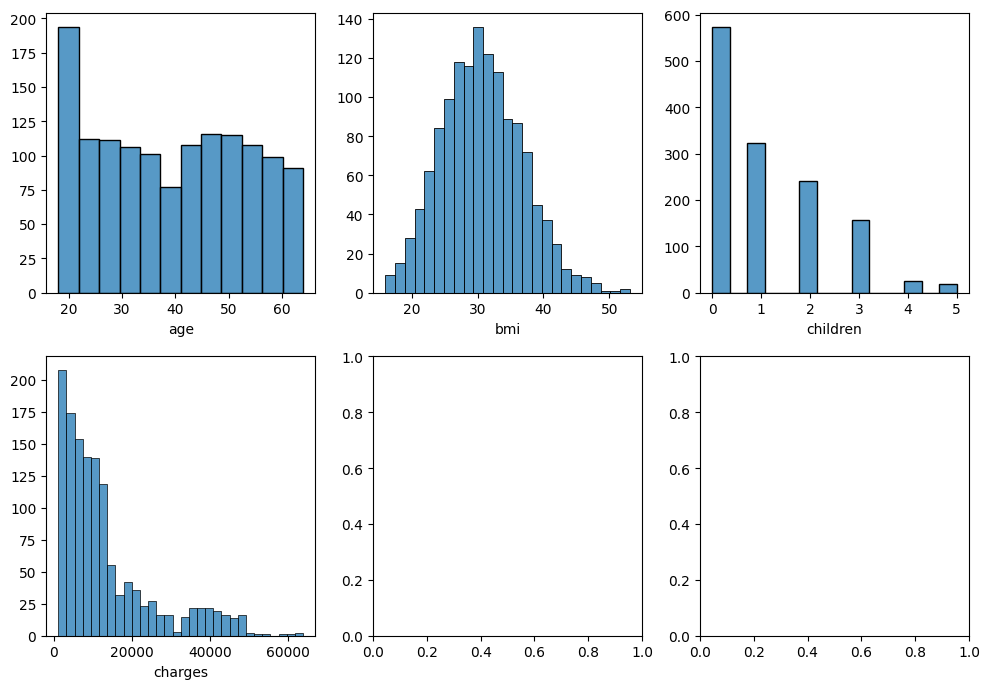

In [5]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = medical, x = "age").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = medical, x = "bmi").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = medical, x = "children").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = medical, x = "charges").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Factorizamos los datos categoricos para poder trabajar con ellos

In [6]:
medical["sex"] = pd.factorize(medical["sex"])[0]
medical["smoker"] = pd.factorize(medical["smoker"])[0]
medical["region"] = pd.factorize(medical["region"])[0]


<Axes: >

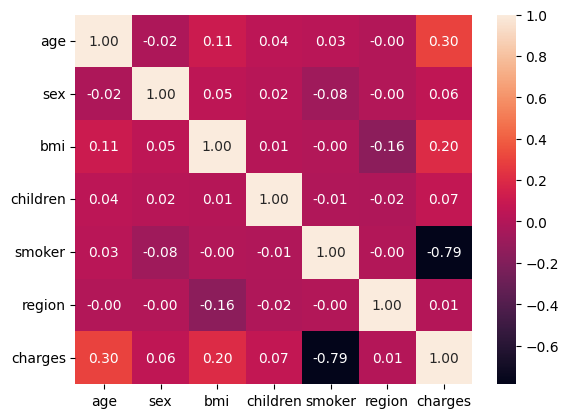

In [7]:
sns.heatmap(medical[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

Aqui podemos ver la relacion que hay entre las variables, se elige smoker, age, bmi ya que tienen mayor relacion

In [8]:
bmi_stats = medical["bmi"].describe()
bmi_stats

bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


In [9]:
medical[medical["bmi"] > 47.29]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,1,1,11381.32540
286,46,0,48.07,2,1,3,9432.92530
401,47,1,47.52,1,1,1,8083.91980
543,54,0,47.41,0,0,1,63770.42801
847,23,1,50.38,1,1,1,2438.05520
860,37,0,47.60,2,0,0,46113.51100
1047,22,1,52.58,1,0,1,44501.39820
1088,52,1,47.74,1,1,1,9748.91060
1317,18,1,53.13,0,1,1,1163.46270


Elegimos las variables importantes para hacer un modelo

In [10]:
medical_data = medical.drop(["sex","children", "region"], axis=1)
medical_data.head()

,age,bmi,smoker,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,1,4449.46200
3,33,22.705,1,21984.47061
4,32,28.880,1,3866.85520


Divimos nuestro conjunto de datos en Datos de entrenamiento y de testeo

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = medical_data.drop("charges", axis = 1)
y = medical_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,smoker
560,46,19.95,1
1285,47,24.32,1
1142,52,24.86,1
969,39,34.32,1
486,54,21.47,1


In [ ]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

Se entrena el modelo que calculará la prima que deben asumir los clientes segun sus características.

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 11967.569512072141
Coeficientes (b1, b2): [   259.41020462    326.45023215 -23675.37184666]


In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")



Error cuadrático medio: 34512843.88022789
Coeficiente de determinación: 0.7776932310583375


el coeficiente de determinaicon es de 77 %